In [15]:
using Turing 
using ReverseDiff
using TorusEvol
using StatsPlots
#Turing.setadbackend(:reversediff)
Turing.setrdcache(true)
Turing.setadbackend(:forwarddiff)
Turing.setprogress!(true)

@model function bisection_sampler(p, y, z)
    t ~ Exponential(1)
    
    y ~ statdist(p)
    x ~ transdist(p, t/2, y)
    z ~ transdist(p, t/2, x)
end

[ Info: [Turing]: progress logging is enabled globally
[ Info: [AdvancedVI]: global PROGRESS is set as true


bisection_sampler (generic function with 4 methods)

Sampling: 100%|█████████████████████████████████████████| Time: 0:00:35


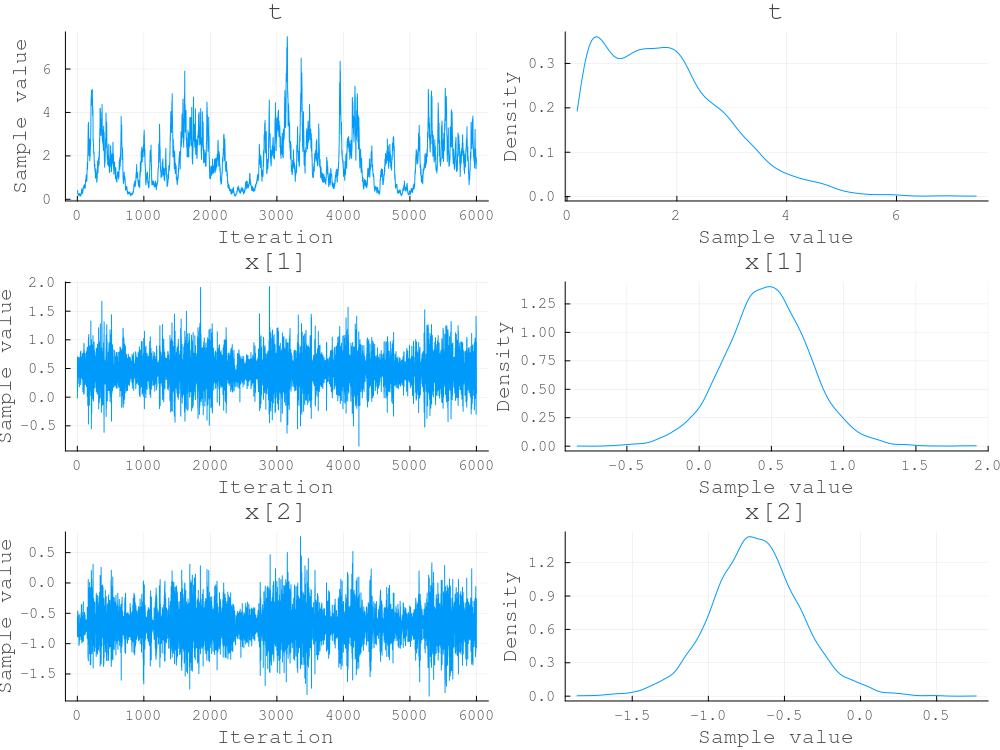

In [19]:
# continuous!!

p = WrappedDiffusion(0.0, 0.0, 0.7, 0.7, 1.0, 1.0, 0.2)
x = [1.0, -2.0]
t = 10.0
y = rand(transdist(p, t/2, x))
z = rand(transdist(p, t/2, x))

model = bisection_sampler(p, y, z)
ch = sample(model, Gibbs(HMC(0.05, 10, :x), HMC(0.02, 5, :t)), 6000)
plot(ch, fontfamily="JuliaMono")

[ Info: 10
[ Info: 10
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:07


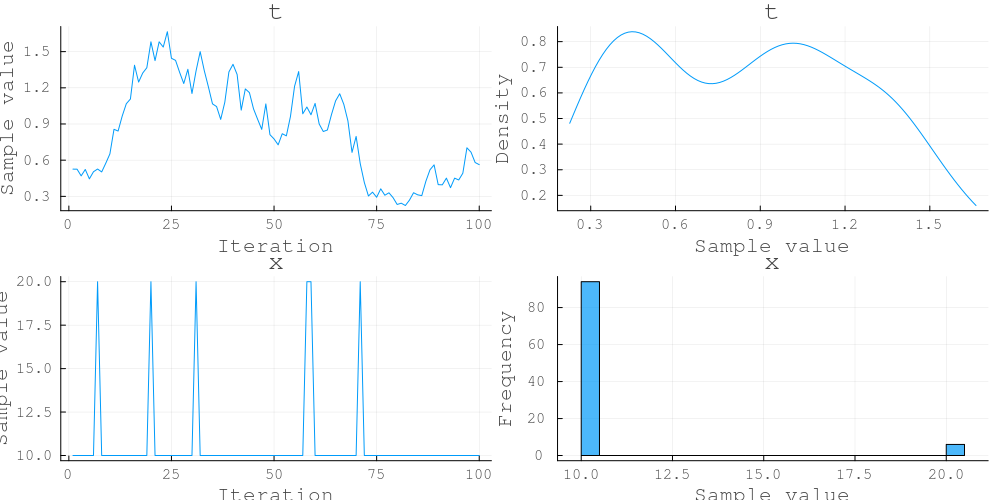

In [26]:
# discrete!!

x = 10
p = WAG_SubstitutionProcess
t = 0.2

y = rand(transdist(p, t/2, x))
@info y

z = rand(transdist(p, t/2, x))
@info z

model = bisection_sampler(p, y, z)
ch = sample(model, Gibbs(HMC(0.03, 5, :t), PG(100, :x)), 100)
plot(ch, fontfamily="JuliaMono")